In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [78]:
df=pd.read_excel("University_Clustering.xlsx")
df.head(2)

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [80]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [81]:
df.drop("State",axis=1,inplace=True)

In [82]:
new_df=df.drop("Univ",axis=1)
new_df.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81


In [83]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 
col=new_df.columns
new_df[col]=ss.fit_transform(new_df[col])
new_df.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524


In [84]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

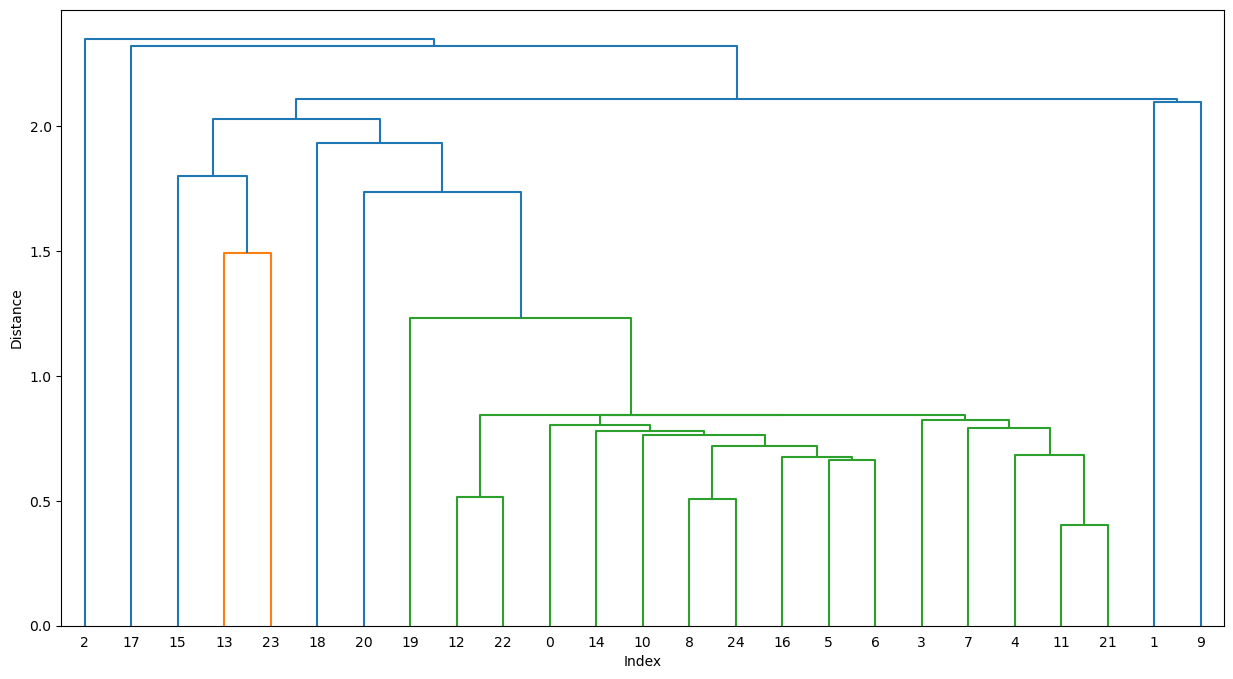

In [85]:
z=linkage(new_df)
plt.figure(figsize=(15,8))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0,
    leaf_font_size=10
)
plt.show()

In [86]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3)
model.fit(new_df)
model.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int64)

In [87]:
df["Label"]=model.labels_
df.head(2)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Label
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0


In [88]:
df[df["Label"]==0]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [89]:
df[df["Label"]==1]["Univ"]

13     PennState
15        Purdue
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [90]:


df[df["Label"]==2]["Univ"]

0            Brown
2              CMU
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [91]:
#(agglomerative) or (divisive)
#KNN,PCA

In [111]:
new_df.head(2)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524


In [113]:
from sklearn.decomposition import PCA
pc=PCA(n_components=3)

In [115]:
components=pc.fit_transform(new_df)
components

array([[-1.00987445, -1.06430962,  0.08106631],
       [-2.82223781,  2.25904458,  0.83682883],
       [ 1.11246577,  1.63120889, -0.26678684],
       [-0.74174122, -0.04218747,  0.06050086],
       [-0.31191206, -0.63524357,  0.01024052],
       [-1.69669089, -0.34436328, -0.25340751],
       [-1.24682093, -0.49098366, -0.03209382],
       [-0.33874978, -0.78516859, -0.49358483],
       [-2.37415013, -0.38653888,  0.11609839],
       [-1.40327739,  2.11951503, -0.44282714],
       [-1.72610332,  0.08823712,  0.17040366],
       [-0.45085748, -0.01113295, -0.17574605],
       [ 0.04023814, -1.00920438, -0.49651717],
       [ 3.23373034, -0.37458049, -0.49537282],
       [-2.23626502, -0.37179329, -0.39899365],
       [ 5.17299212,  0.77991535, -0.38591233],
       [-1.69964377, -0.30559745,  0.31850785],
       [ 4.578146  , -0.34759136,  1.49964176],
       [ 0.82260312, -0.69890615,  1.42781145],
       [-0.09776213,  0.65044645,  0.10050844],
       [ 1.9631826 , -0.22476756, -0.255

In [117]:
pc0=components[:,0]
pc1=components[:,1]
pc2=components[:,2]

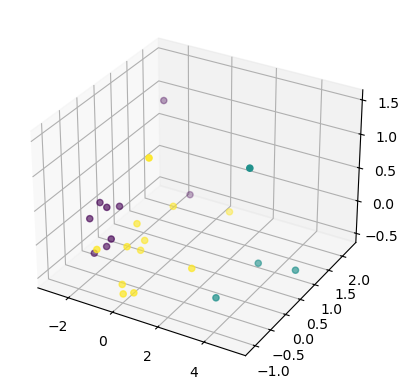

In [147]:
ax=plt.axes(projection='3d')
ax.scatter(pc0,pc1,pc2,c=df["Label"])
plt.show()

In [ ]:
df[]